In [124]:
import pandas as pd
import numpy as np
import math
dfship_pre = pd.read_csv("AIS_weather_h_rename_copy.csv")
dfship_pre.head(n=5)

,Time,LON,LAT,Eastward wind,Northward wind,Temperature above oceans,Air density above oceans,Max wave height,Swell direction,Wind wave direction,...,Wind wave height,Surface pressure,Eastward current,Northward current,Draught,Width,Length,SOG,COG,Heading
0,01/01/21 00:00,14.689663,55.098452,2.267688,6.741482,277.311035,1.259323,1.893614,196.854050,196.749664,...,0.805267,100445.5000,0.113690,0.044994,5.026295,24,158,0.0,358.9,174.0
1,01/01/21 01:00,14.689659,55.098451,1.782681,6.410275,277.328369,1.259985,1.752303,200.122772,193.152008,...,0.641006,100439.6875,0.113690,0.044994,5.013148,24,158,0.0,358.9,174.0
2,01/01/21 02:00,14.689648,55.098468,1.154659,6.385135,277.390625,1.260244,1.619775,202.498383,186.424912,...,0.545059,100464.3750,0.083984,0.054000,5.021913,24,158,0.0,358.9,174.0
3,01/01/21 03:00,14.689646,55.098471,0.348801,6.094659,277.411377,1.260148,1.518736,203.956986,180.725922,...,0.515686,100443.6250,0.083984,0.054000,5.007304,24,158,0.0,358.9,174.0
4,01/01/21 04:00,14.689644,55.098462,-0.593128,6.153186,277.430664,1.260634,1.455034,208.486298,177.761627,...,0.549881,100437.9375,0.083984,0.054000,5.007889,24,158,0.0,358.9,174.0


In [125]:
dfship_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7996 entries, 0 to 7995
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Time                                  7996 non-null   object 
 1   LON                                   7996 non-null   float64
 2   LAT                                   7996 non-null   float64
 3   Eastward wind                         7996 non-null   float64
 4   Northward wind                        7996 non-null   float64
 5   Temperature above oceans              7996 non-null   float64
 6   Air density above oceans              7880 non-null   float64
 7   Max wave height                       6817 non-null   float64
 8   Swell direction                       6817 non-null   float64
 9   Wind wave direction                   6817 non-null   float64
 10  Swell period                          6817 non-null   float64
 11  Wind wave period 

In [126]:
# Filter any latitude values smaller than 55.04 to exlcude journey between 
# Ronne and Sassnitz
dfship_pre2 = dfship_pre[dfship_pre['LAT'] > 55.04 ]
dfship_pre2.head(n=10)


,Time,LON,LAT,Eastward wind,Northward wind,Temperature above oceans,Air density above oceans,Max wave height,Swell direction,Wind wave direction,...,Wind wave height,Surface pressure,Eastward current,Northward current,Draught,Width,Length,SOG,COG,Heading
0,01/01/21 00:00,14.689663,55.098452,2.267688,6.741482,277.311035,1.259323,1.893614,196.854050,196.749664,...,0.805267,100445.5000,0.113690,0.044994,5.026295,24,158,0.000000,358.900000,174.000000
1,01/01/21 01:00,14.689659,55.098451,1.782681,6.410275,277.328369,1.259985,1.752303,200.122772,193.152008,...,0.641006,100439.6875,0.113690,0.044994,5.013148,24,158,0.000000,358.900000,174.000000
2,01/01/21 02:00,14.689648,55.098468,1.154659,6.385135,277.390625,1.260244,1.619775,202.498383,186.424912,...,0.545059,100464.3750,0.083984,0.054000,5.021913,24,158,0.000000,358.900000,174.000000
3,01/01/21 03:00,14.689646,55.098471,0.348801,6.094659,277.411377,1.260148,1.518736,203.956986,180.725922,...,0.515686,100443.6250,0.083984,0.054000,5.007304,24,158,0.000000,358.900000,174.000000
4,01/01/21 04:00,14.689644,55.098462,-0.593128,6.153186,277.430664,1.260634,1.455034,208.486298,177.761627,...,0.549881,100437.9375,0.083984,0.054000,5.007889,24,158,0.000000,358.900000,174.000000
5,01/01/21 05:00,14.689649,55.098455,-1.140082,6.917303,277.389648,1.260749,1.449675,216.184876,175.198700,...,0.621552,100426.3125,0.048465,0.099054,5.016434,24,158,0.000000,358.900000,174.000000
6,01/01/21 06:00,14.689636,55.098470,-1.244867,7.608953,277.320557,1.261436,1.518332,220.624313,174.294296,...,0.705246,100440.9375,0.048465,0.099054,5.021130,24,158,0.000000,358.900000,174.000000
7,01/01/21 07:00,14.689641,55.098466,-0.910214,7.986181,277.155518,1.261738,1.623140,212.309525,174.913208,...,0.779129,100438.1250,0.048465,0.099054,5.014087,24,158,0.000000,358.900000,174.000000
8,01/01/21 08:00,14.559275,55.121629,0.137991,7.647350,276.900391,1.261916,1.661038,187.445587,178.761826,...,0.801956,100538.0000,0.083033,0.062728,5.017723,24,158,14.578394,299.573513,269.900574
9,01/01/21 09:00,14.150896,55.261799,1.049884,6.617633,276.705566,1.262235,1.501637,165.581848,185.115234,...,0.578049,100602.7500,0.061865,0.083661,5.019207,24,158,18.148696,302.274508,300.130435


In [127]:
dfship_pre2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7453 entries, 0 to 7995
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Time                                  7453 non-null   object 
 1   LON                                   7453 non-null   float64
 2   LAT                                   7453 non-null   float64
 3   Eastward wind                         7453 non-null   float64
 4   Northward wind                        7453 non-null   float64
 5   Temperature above oceans              7453 non-null   float64
 6   Air density above oceans              7337 non-null   float64
 7   Max wave height                       6274 non-null   float64
 8   Swell direction                       6274 non-null   float64
 9   Wind wave direction                   6274 non-null   float64
 10  Swell period                          6274 non-null   float64
 11  Wind wave period 

In [128]:
dfship_pre3 = dfship_pre2.drop(dfship_pre2.columns[[0,5,6,7,8,9,10,11,12,13,14,15,16,17,18,21,22,23]],axis=1)
dfship_pre3.head(n=5)

,LON,LAT,Eastward wind,Northward wind,Eastward current,Northward current,SOG,COG,Heading
0,14.689663,55.098452,2.267688,6.741482,0.113690,0.044994,0.0,358.9,174.0
1,14.689659,55.098451,1.782681,6.410275,0.113690,0.044994,0.0,358.9,174.0
2,14.689648,55.098468,1.154659,6.385135,0.083984,0.054000,0.0,358.9,174.0
3,14.689646,55.098471,0.348801,6.094659,0.083984,0.054000,0.0,358.9,174.0
4,14.689644,55.098462,-0.593128,6.153186,0.083984,0.054000,0.0,358.9,174.0


In [129]:
dfship_pre3 = dfship_pre3.rename({'Eastward wind': 'eastwind', 'Northward wind': 'northwind',
                           'Eastward current': 'eastcurrent', 'Northward current': 'northcurrent',
                           'SOG':'sog','COG':'cog','Heading':'heading'},axis=1) 
dfship_pre3.head(n=5)

,LON,LAT,eastwind,northwind,eastcurrent,northcurrent,sog,cog,heading
0,14.689663,55.098452,2.267688,6.741482,0.113690,0.044994,0.0,358.9,174.0
1,14.689659,55.098451,1.782681,6.410275,0.113690,0.044994,0.0,358.9,174.0
2,14.689648,55.098468,1.154659,6.385135,0.083984,0.054000,0.0,358.9,174.0
3,14.689646,55.098471,0.348801,6.094659,0.083984,0.054000,0.0,358.9,174.0
4,14.689644,55.098462,-0.593128,6.153186,0.083984,0.054000,0.0,358.9,174.0


In [130]:

dfship_pre3["windspeed"] = np.sqrt(dfship_pre3["eastwind"]**2 + dfship_pre3["northwind"]**2)
dfship_pre3["winddir"] = np.rad2deg(np.arctan(dfship_pre3["eastwind"]/dfship_pre3["northwind"]))
dfship_pre3["curspeed"] = np.sqrt(dfship_pre3["eastcurrent"]**2 + dfship_pre3["northcurrent"]**2)
dfship_pre3["curdir"] = np.rad2deg(np.arctan(dfship_pre3["eastcurrent"]/dfship_pre3["northcurrent"]))

In [131]:
dfship_pre3.head(n=15)

,LON,LAT,eastwind,northwind,eastcurrent,northcurrent,sog,cog,heading,windspeed,winddir,curspeed,curdir
0,14.689663,55.098452,2.267688,6.741482,0.113690,0.044994,0.000000,358.900000,174.000000,7.112664,18.591820,0.122270,68.408246
1,14.689659,55.098451,1.782681,6.410275,0.113690,0.044994,0.000000,358.900000,174.000000,6.653538,15.541109,0.122270,68.408246
2,14.689648,55.098468,1.154659,6.385135,0.083984,0.054000,0.000000,358.900000,174.000000,6.488697,10.250337,0.099846,57.259552
3,14.689646,55.098471,0.348801,6.094659,0.083984,0.054000,0.000000,358.900000,174.000000,6.104632,3.275496,0.099846,57.259552
4,14.689644,55.098462,-0.593128,6.153186,0.083984,0.054000,0.000000,358.900000,174.000000,6.181707,-5.505940,0.099846,57.259552
5,14.689649,55.098455,-1.140082,6.917303,0.048465,0.099054,0.000000,358.900000,174.000000,7.010625,-9.359123,0.110275,26.071643
6,14.689636,55.098470,-1.244867,7.608953,0.048465,0.099054,0.000000,358.900000,174.000000,7.710115,-9.291591,0.110275,26.071643
7,14.689641,55.098466,-0.910214,7.986181,0.048465,0.099054,0.000000,358.900000,174.000000,8.037884,-6.502153,0.110275,26.071643
8,14.559275,55.121629,0.137991,7.647350,0.083033,0.062728,14.578394,299.573513,269.900574,7.648595,1.033749,0.104064,52.930471
9,14.150896,55.261799,1.049884,6.617633,0.061865,0.083661,18.148696,302.274508,300.130435,6.700397,9.014812,0.104050,36.481737


In [132]:
dfship_pre3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7453 entries, 0 to 7995
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LON           7453 non-null   float64
 1   LAT           7453 non-null   float64
 2   eastwind      7453 non-null   float64
 3   northwind     7453 non-null   float64
 4   eastcurrent   5941 non-null   float64
 5   northcurrent  5941 non-null   float64
 6   sog           7453 non-null   float64
 7   cog           7453 non-null   float64
 8   heading       7453 non-null   float64
 9   windspeed     7453 non-null   float64
 10  winddir       7453 non-null   float64
 11  curspeed      5941 non-null   float64
 12  curdir        5941 non-null   float64
dtypes: float64(13)
memory usage: 815.2 KB


In [133]:
dfship_pre3.describe()

,LON,LAT,eastwind,northwind,eastcurrent,northcurrent,sog,cog,heading,windspeed,winddir,curspeed,curdir
count,7453.000000,7453.000000,7453.000000,7453.000000,5941.000000,5941.000000,7453.000000,7453.000000,7453.000000,7453.000000,7453.000000,5941.000000,5941.000000
mean,13.774095,55.210011,1.976344,0.379926,0.016286,0.003318,8.870751,242.699284,175.747154,6.513813,6.323949,0.109891,-1.886893
std,0.977055,0.132433,5.296850,4.429899,0.099475,0.081795,8.619512,108.555287,66.793790,3.048934,56.940496,0.069166,55.917644
min,12.196909,55.040170,-15.216397,-12.824582,-0.491010,-0.404690,-0.009130,-0.134241,63.486661,0.193221,-89.961480,0.000735,-89.957853
25%,12.871872,55.098459,-1.756650,-2.534061,-0.037983,-0.044471,0.000000,124.116508,109.576119,4.149883,-46.613951,0.059163,-52.440600
50%,14.101697,55.141606,2.294543,0.385690,0.019269,0.003562,6.953578,283.216008,173.847507,6.285080,12.348882,0.095501,-5.343045
75%,14.689640,55.275562,5.838650,3.339456,0.072372,0.047412,18.014436,346.200000,174.612903,8.525129,59.985376,0.143550,49.866955
max,14.696212,55.639000,16.338177,14.519458,0.522374,0.364966,21.070514,359.728115,354.145635,16.760001,89.907884,0.525174,89.975398


Calculation for STW and SOG 

In [134]:
#dfship_pre3["vg_x"] = (dfship_pre3["sog"] * np.sin(np.deg2rad(dfship_pre3["cog"])))/1.9438
#dfship_pre3["vc"] = (dfship_pre3["curspeed"]) * np.sin(np.deg2rad(dfship_pre3["curdir"]))
#dfship_pre3["vwms"] = (dfship_pre3["vg_x"] - dfship_pre3["vc"]) / np.sin(np.deg2rad(dfship_pre3["heading"]))
#dfship_pre3["vwknot"] = dfship_pre3["vwms"] * 1.9438
#dfship_pre3.head(n=15)

dfship_pre3["vgms"] = dfship_pre3["sog"]/1.9438
dfship_pre3["vwmsqr"] = dfship_pre3["curspeed"]**2 + dfship_pre3["vgms"]**2 + 2*dfship_pre3["curspeed"]*dfship_pre3["sog"]*np.cos(np.deg2rad(dfship_pre3["curdir"]))
dfship_pre3["vwms"] = np.sqrt(dfship_pre3["curspeed"]**2 + dfship_pre3["vgms"]**2 + 2*dfship_pre3["curspeed"]*dfship_pre3["sog"]*np.cos(np.deg2rad(dfship_pre3["curdir"])))
dfship_pre3["vwknot"] = dfship_pre3["vwms"]*1.9438
dfship_pre3.head(n=15)

#dfship_pre3.to_csv("AIS_curdir.csv")

,LON,LAT,eastwind,northwind,eastcurrent,northcurrent,sog,cog,heading,windspeed,winddir,curspeed,curdir,vgms,vwmsqr,vwms,vwknot
0,14.689663,55.098452,2.267688,6.741482,0.113690,0.044994,0.000000,358.900000,174.000000,7.112664,18.591820,0.122270,68.408246,0.000000,0.014950,0.122270,0.237667
1,14.689659,55.098451,1.782681,6.410275,0.113690,0.044994,0.000000,358.900000,174.000000,6.653538,15.541109,0.122270,68.408246,0.000000,0.014950,0.122270,0.237667
2,14.689648,55.098468,1.154659,6.385135,0.083984,0.054000,0.000000,358.900000,174.000000,6.488697,10.250337,0.099846,57.259552,0.000000,0.009969,0.099846,0.194082
3,14.689646,55.098471,0.348801,6.094659,0.083984,0.054000,0.000000,358.900000,174.000000,6.104632,3.275496,0.099846,57.259552,0.000000,0.009969,0.099846,0.194082
4,14.689644,55.098462,-0.593128,6.153186,0.083984,0.054000,0.000000,358.900000,174.000000,6.181707,-5.505940,0.099846,57.259552,0.000000,0.009969,0.099846,0.194082
5,14.689649,55.098455,-1.140082,6.917303,0.048465,0.099054,0.000000,358.900000,174.000000,7.010625,-9.359123,0.110275,26.071643,0.000000,0.012161,0.110275,0.214353
6,14.689636,55.098470,-1.244867,7.608953,0.048465,0.099054,0.000000,358.900000,174.000000,7.710115,-9.291591,0.110275,26.071643,0.000000,0.012161,0.110275,0.214353
7,14.689641,55.098466,-0.910214,7.986181,0.048465,0.099054,0.000000,358.900000,174.000000,8.037884,-6.502153,0.110275,26.071643,0.000000,0.012161,0.110275,0.214353
8,14.559275,55.121629,0.137991,7.647350,0.083033,0.062728,14.578394,299.573513,269.900574,7.648595,1.033749,0.104064,52.930471,7.499945,58.088967,7.621612,14.814889
9,14.150896,55.261799,1.049884,6.617633,0.061865,0.083661,18.148696,302.274508,300.130435,6.700397,9.014812,0.104050,36.481737,9.336709,90.221650,9.498508,18.463199


In [135]:
dfship_pre3.describe()

,LON,LAT,eastwind,northwind,eastcurrent,northcurrent,sog,cog,heading,windspeed,winddir,curspeed,curdir,vgms,vwmsqr,vwms,vwknot
count,7453.000000,7453.000000,7453.000000,7453.000000,5941.000000,5941.000000,7453.000000,7453.000000,7453.000000,7453.000000,7453.000000,5941.000000,5941.000000,7453.000000,5941.000000,5941.000000,5941.000000
mean,13.774095,55.210011,1.976344,0.379926,0.016286,0.003318,8.870751,242.699284,175.747154,6.513813,6.323949,0.109891,-1.886893,4.563613,40.406728,4.457493,8.664475
std,0.977055,0.132433,5.296850,4.429899,0.099475,0.081795,8.619512,108.555287,66.793790,3.048934,56.940496,0.069166,55.917644,4.434362,44.001740,4.532212,8.809713
min,12.196909,55.040170,-15.216397,-12.824582,-0.491010,-0.404690,-0.009130,-0.134241,63.486661,0.193221,-89.961480,0.000735,-89.957853,-0.004697,0.000002,0.001363,0.002650
25%,12.871872,55.098459,-1.756650,-2.534061,-0.037983,-0.044471,0.000000,124.116508,109.576119,4.149883,-46.613951,0.059163,-52.440600,0.000000,0.009969,0.099846,0.194082
50%,14.101697,55.141606,2.294543,0.385690,0.019269,0.003562,6.953578,283.216008,173.847507,6.285080,12.348882,0.095501,-5.343045,3.577311,1.470660,1.212708,2.357261
75%,14.689640,55.275562,5.838650,3.339456,0.072372,0.047412,18.014436,346.200000,174.612903,8.525129,59.985376,0.143550,49.866955,9.267639,88.835155,9.425240,18.320782
max,14.696212,55.639000,16.338177,14.519458,0.522374,0.364966,21.070514,359.728115,354.145635,16.760001,89.907884,0.525174,89.975398,10.839857,121.455642,11.020692,21.422020


In [136]:
dfship_pre4 = dfship_pre3.drop(dfship_pre3.columns[[0,1,2,3,4,5,7,8]],axis=1)
dfship_pre4.head(n=15)

,sog,windspeed,winddir,curspeed,curdir,vgms,vwmsqr,vwms,vwknot
0,0.000000,7.112664,18.591820,0.122270,68.408246,0.000000,0.014950,0.122270,0.237667
1,0.000000,6.653538,15.541109,0.122270,68.408246,0.000000,0.014950,0.122270,0.237667
2,0.000000,6.488697,10.250337,0.099846,57.259552,0.000000,0.009969,0.099846,0.194082
3,0.000000,6.104632,3.275496,0.099846,57.259552,0.000000,0.009969,0.099846,0.194082
4,0.000000,6.181707,-5.505940,0.099846,57.259552,0.000000,0.009969,0.099846,0.194082
5,0.000000,7.010625,-9.359123,0.110275,26.071643,0.000000,0.012161,0.110275,0.214353
6,0.000000,7.710115,-9.291591,0.110275,26.071643,0.000000,0.012161,0.110275,0.214353
7,0.000000,8.037884,-6.502153,0.110275,26.071643,0.000000,0.012161,0.110275,0.214353
8,14.578394,7.648595,1.033749,0.104064,52.930471,7.499945,58.088967,7.621612,14.814889
9,18.148696,6.700397,9.014812,0.104050,36.481737,9.336709,90.221650,9.498508,18.463199


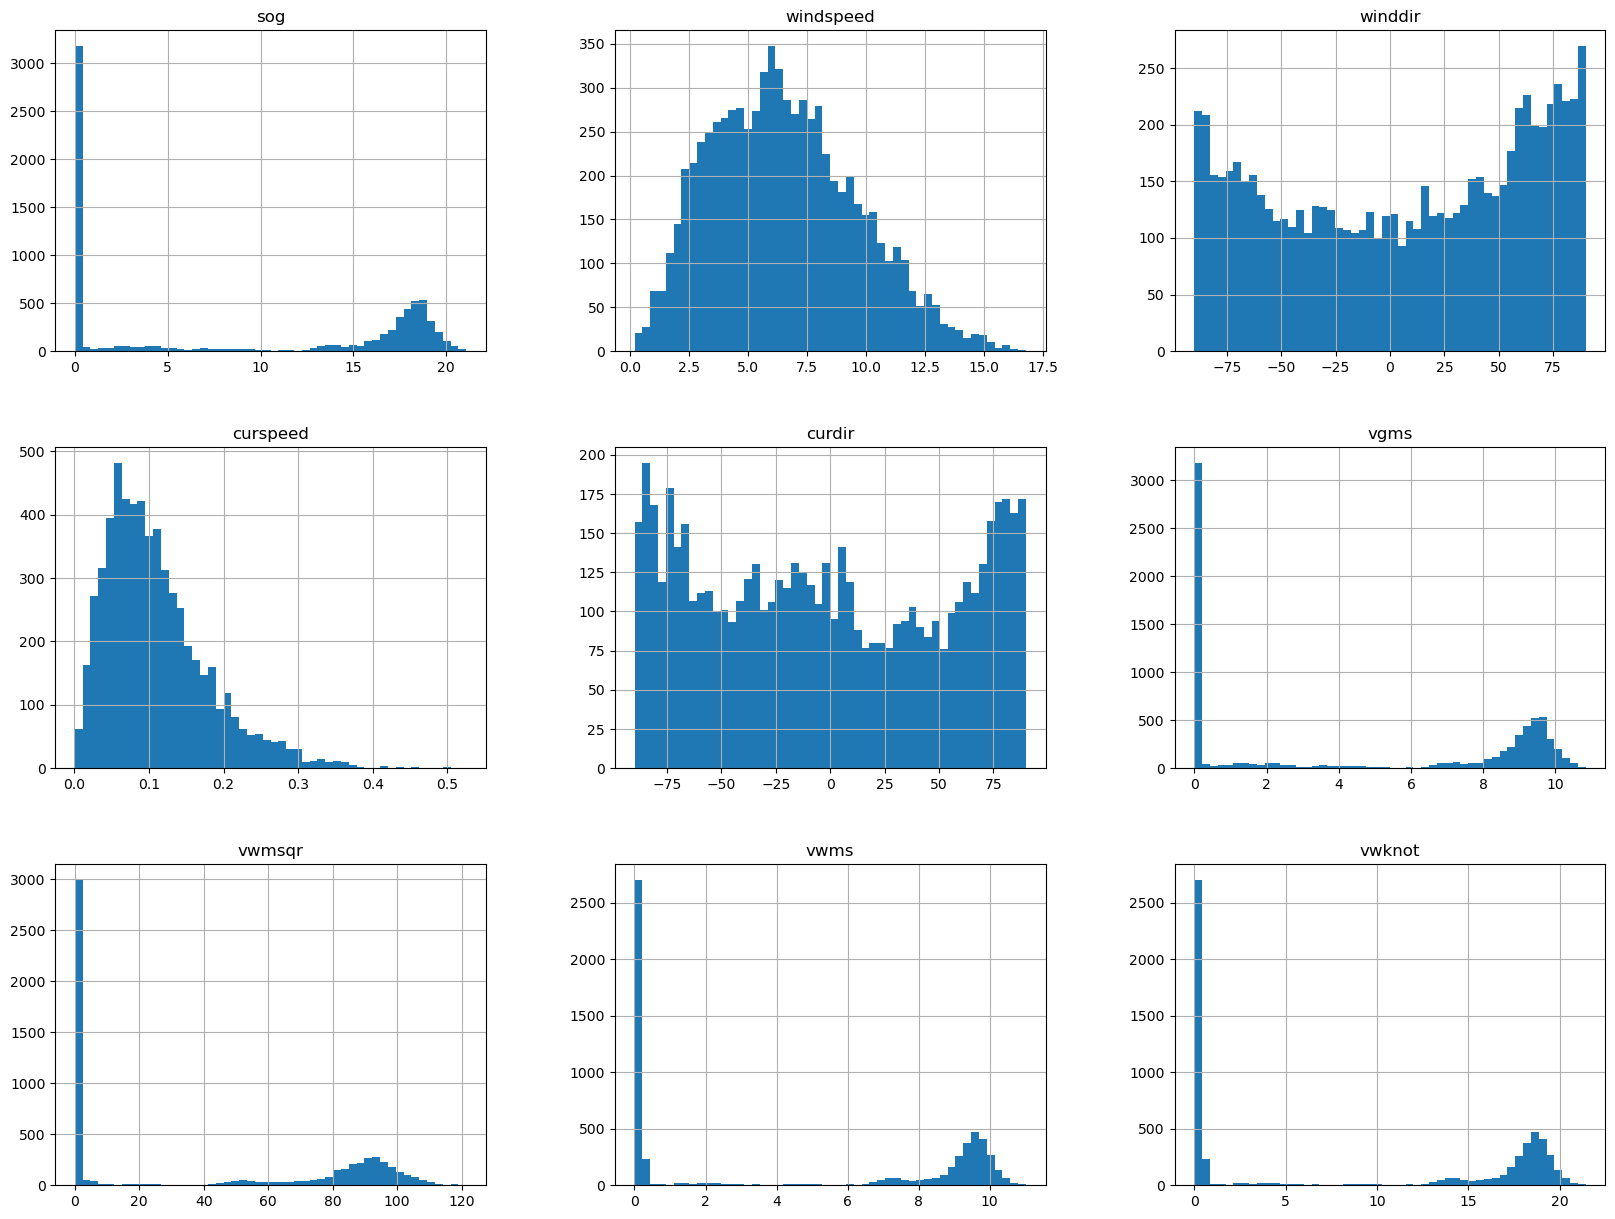

In [137]:
import matplotlib.pyplot as plt
dfship_pre4.hist(bins=50,figsize=(20,15))
plt.show()

In [138]:
dfchk= dfship_pre4[dfship_pre4["sog"] > dfship_pre4["vwknot"] ]
dfchk.head(n=10)

,sog,windspeed,winddir,curspeed,curdir,vgms,vwmsqr,vwms,vwknot


In [139]:
dfchk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sog        0 non-null      float64
 1   windspeed  0 non-null      float64
 2   winddir    0 non-null      float64
 3   curspeed   0 non-null      float64
 4   curdir     0 non-null      float64
 5   vgms       0 non-null      float64
 6   vwmsqr     0 non-null      float64
 7   vwms       0 non-null      float64
 8   vwknot     0 non-null      float64
dtypes: float64(9)
memory usage: 0.0 bytes
